# Posting in Hacker News: Posting Time Affects the Number of Comments (Analysis with Pandas)
Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

In this project, I aim to use **Pandas** to compare two types of posts, titles begin with either Ask HN or Show HN, to determine the following:

* Do Ask HN or Show HN receive more comments on average?
* Do posts created at a certain time receive more comments on average?

### Summary of Results

The data shows that the Ask HN posts received more comments than the Show HN posts on average, indicating that Ask HN posts are more likely to receive comments. For Ask HN posts, creating a post at 15:00 Eastern Time in the US (which corresponds to UK time 20:00), has a higher chance of receiving comments.

## Read the data

The data used for the analysis was accessed via https://www.kaggle.com/datasets/hacker-news/hacker-news-posts

In [54]:
# import relavant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Read in the data
df=pd.read_csv('hacker_news.csv')


## Exploration of the data

In [10]:
# Quick exploration of the data
print(df.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
df.head()

(293119, 7)


,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [11]:
# check null values
print(df.isna().sum())

id                  0
title               0
url             13863
num_points          0
num_comments        0
author              0
created_at          0
dtype: int64


There are a large amount of missing data for the column 'url'. As our interest is not in 'url' but other columns where there is none missing data, we will keep all the data for the analysis.

In [12]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


## Data extration
Extracting Ask HN and Show HN Posts as we are interested in those posts

In [14]:
# Extract the post with tile (column 2) starting with 'ask hn' or 'show hn'
ask_HN=df[df['title'].str.lower().str.startswith('ask hn')]
show_HN=df[df['title'].str.lower().str.startswith('show hn')]
print(ask_HN.shape[0])
print(show_HN.shape[0])
ask_HN.head()

9139
10158


,id,title,url,num_points,num_comments,author,created_at
10,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53
42,12578522,Ask HN: How do you pass on your work when you ...,NaN,6,3,PascLeRasc,9/26/2016 1:17
76,12577908,Ask HN: How a DNS problem can be limited to a ...,NaN,1,0,kuon,9/25/2016 22:57
80,12577870,Ask HN: Why join a fund when you can be an angel?,NaN,1,3,anthony_james,9/25/2016 22:48
102,12577647,Ask HN: Someone uses stock trading as passive ...,NaN,5,2,00taffe,9/25/2016 21:50


## Average number of comments for Ask HN and Show HN Posts

In [15]:
# Calculate the Average Number of Comments for Ask HN posts 
avg_ask_comments=ask_HN['num_comments'].mean()
print(f'ask posts average comments number:{avg_ask_comments}')

# Calculate the Average Number of Comments for Show HN posts 
avg_show_comments=show_HN['num_comments'].mean()
print(f'show posts average comments number:{avg_show_comments}')

ask posts average comments number:10.393478498741656
show posts average comments number:4.886099625910612


The ask posts received more comments than the shows posts on average, indicating that ask posts are more likely to receive comments

## Finding the amount of Ask Posts and comments by hour created

In [20]:
# Check the data and date format
print(ask_HN.head())
print(ask_HN.tail())

           id                                              title  url  \
10   12578908  Ask HN: What TLD do you use for local developm...  NaN   
42   12578522  Ask HN: How do you pass on your work when you ...  NaN   
76   12577908  Ask HN: How a DNS problem can be limited to a ...  NaN   
80   12577870  Ask HN: Why join a fund when you can be an angel?  NaN   
102  12577647  Ask HN: Someone uses stock trading as passive ...  NaN   

     num_points  num_comments         author       created_at  
10            4             7        Sevrene   9/26/2016 2:53  
42            6             3     PascLeRasc   9/26/2016 1:17  
76            1             0           kuon  9/25/2016 22:57  
80            1             3  anthony_james  9/25/2016 22:48  
102           5             2        00taffe  9/25/2016 21:50  
              id                                              title  url  \
293047  10177359  Ask HN: Is coursera specialization in product ...  NaN   
293052  10177317  Ask HN:

By checking the data in 'crated_at' column, we can know that the format of the date is M/D/Y

In [97]:
# Convert the date to a pandas datetime object, then extract the hour from the date
ask_HN.loc[:,'created_at']=pd.to_datetime(ask_HN['created_at'], format='%m/%d/%Y %H:%M')
ask_HN.loc[:,'created_at_hour']=ask_HN['created_at'].dt.hour

# Group by hour
posts_by_hour=ask_HN.groupby('created_at_hour')[['num_comments']].agg(['count','sum','mean'])
print(posts_by_hour.shape)
print(posts_by_hour.columns)

# flatten the MultiIndex columns  
posts_by_hour.columns = ['post_count', 'num_comments_sum', 'num_comments_mean']
# print(posts_by_hour.columns)
posts_by_hour.head()

(24, 3)
MultiIndex([('num_comments', 'count'),
            ('num_comments',   'sum'),
            ('num_comments',  'mean')],
           )


,post_count,num_comments_sum,num_comments_mean
created_at_hour,,,
0,301,2277,7.564784
1,282,2089,7.407801
2,269,2996,11.137546
3,271,2154,7.948339
4,243,2360,9.711934


In [98]:
# Sorting the result
posts_by_hour=posts_by_hour.sort_values(by='num_comments_mean',ascending=False)
posts_by_hour.head(5)  


,post_count,num_comments_sum,num_comments_mean
created_at_hour,,,
15,646,18525,28.676471
13,444,7245,16.317568
12,342,4234,12.380117
2,269,2996,11.137546
10,282,3013,10.684397


In [99]:
# reset index and tranform the column of 'created_at_hour' to a string format for illustration
posts_by_hour=posts_by_hour.reset_index()
posts_by_hour['created_at_hour_str']=posts_by_hour['created_at_hour'].apply(lambda x: f'{x:02d}:00')
posts_by_hour.head()

,created_at_hour,post_count,num_comments_sum,num_comments_mean,created_at_hour_str
0,15,646,18525,28.676471,15:00
1,13,444,7245,16.317568,13:00
2,12,342,4234,12.380117,12:00
3,2,269,2996,11.137546,02:00
4,10,282,3013,10.684397,10:00


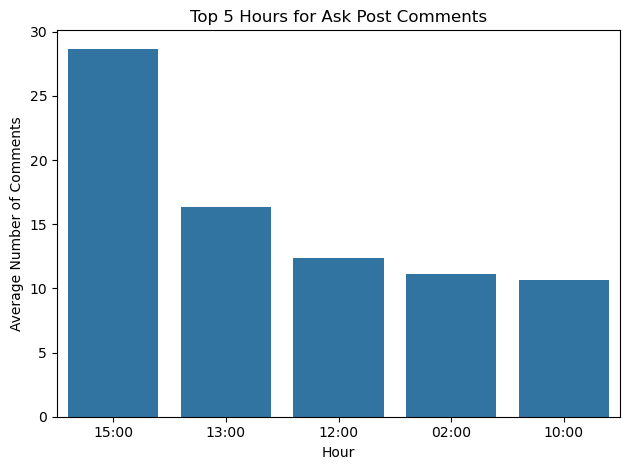

In [102]:
# Show the results with a bar chart
sns.barplot(data=posts_by_hour[:5],
            y='num_comments_mean',
            x='created_at_hour_str',
            order=posts_by_hour['created_at_hour_str'][:5],
           )
plt.title('Top 5 Hours for Ask Post Comments')
plt.xlabel('Hour')
plt.ylabel('Average Number of Comments')
plt.tight_layout()
plt.show()


* Creating a post at 15:00 (Eastern Time in the US) has a higher chance of receiving comments; the next popular hour is 13:00
* This corresponds to UK time 20:00 and 18:00.

# Conculsion
In this work, I analysed the post data on Hacker News with special interest in Ask HN posts and Show HN posts.

The analysis shows that the Ask HN posts received more comments than the Show HN posts on average, indicating that Ask HN posts are more likely to receive comments. For Ask HN posts, creating a post at 15:00 Eastern Time in the US (which corresponds to UK time 20:00), has a higher chance of receiving comments.